<a href="https://colab.research.google.com/github/Angana1/Stock-Price-Prediction-London-Metal-Exchange-/blob/main/westmetall_multivariate_multistep_CNN_Monthly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# multivariate multi-step 1d cnn 
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import LSTM
from matplotlib import pyplot as plt

# Processing Data

In [ ]:
lead=pd.read_csv('/content/Monthly Weighted Avg Lead Price.csv')
usdinr=pd.read_csv('/content/USDINR_monthlyAvg.csv')

# 'data' is the data to be used as training data (no date column)
data = pd.DataFrame(lead, columns=['Weighted Average Price'])
data=pd.concat([data, usdinr['Close Monthly Average']], axis=1,ignore_index=True)
data.columns = ['Lead Monthly Avg', 'Exchange Rate Monthly Avg']
print(data.dtypes)
print(data)

Lead Monthly Avg             float64
Exchange Rate Monthly Avg    float64
dtype: object
     Lead Monthly Avg  Exchange Rate Monthly Avg
0         2601.678175                  39.245904
1         2797.112343                  39.643000
2         1802.000000                  40.080613
3         1802.000000                  39.889666
4         1802.000000                  41.944484
..                ...                        ...
156       2012.419036                  73.138439
157       2089.104842                  72.791140
158       1954.569200                  72.801716
159       1997.856000                  74.454233
160       2188.551802                  73.582459

[161 rows x 2 columns]


In [ ]:
All_dates = pd.to_datetime(lead['Date'],format="%b-%y")
print(All_dates.dtype)
print(All_dates)

datetime64[ns]
0     2008-01-01
1     2008-02-01
2     2008-03-01
3     2008-04-01
4     2008-05-01
         ...    
156   2021-01-01
157   2021-02-01
158   2021-03-01
159   2021-04-01
160   2021-05-01
Name: Date, Length: 161, dtype: datetime64[ns]


In [ ]:
data_list=data.values.tolist()

In [ ]:
print(data_list)
print(len(data_list))

[[2601.678175, 39.24590368], [2797.112343, 39.64299959], [1802.0, 40.08061306], [1802.0, 39.8896665], [1802.0, 41.94448403], [1800.8000260000001, 42.7197666], [1932.2514010000002, 42.74087074], [1919.9304550000002, 42.66786935], [1863.798966, 45.47983370000001], [1478.6081869999998, 48.46535503], [1294.481297, 48.878266700000005], [950.4675999, 48.49203197], [1128.465077, 48.63135532], [1099.761684, 49.06714275], [1239.395415, 51.10283835], [1390.705523, 49.84936663], [1451.034369, 48.39287129], [1671.34512, 47.64033333], [1679.909568, 48.3549679], [1916.011438, 48.21438674], [2195.296487, 48.297600200000005], [2240.709609, 46.65551629], [2307.430887, 46.50300013], [2328.488271, 46.52129071], [2359.6682969999997, 45.96461332], [2127.8501890000002, 46.2535], [2173.757048, 45.38058084], [2261.099385, 44.39746677], [1896.6256809999998, 45.72999984], [1705.4655699999998, 46.43910033], [1837.386732, 46.660613], [2069.193951, 46.46487094], [2187.428754, 46.02349987], [2382.550097, 44.3183873

In [ ]:
training_size=141
test_size=20

Making test data:

In [ ]:
#Making test data
testX=[]
testY=[]
testXdates=[]
testYdates=[]
n_future=5
n_past=10
for i in range(len(data_list)-test_size+n_past, len(data_list )-n_future):
    temp1=[]
    temp2=[]
    testX.append(data_list[i - n_past:i])
    testXdates.append(All_dates[i - n_past:i])
    for j in range(i,i+n_future):
      temp1.append(data_list[j][0])
      temp2.append(All_dates[j])
    testY.append(temp1)
    testYdates.append(temp2)

In [ ]:
print("Length of TestX:",len(testX))
print("Length of TestY:",len(testY))
print("Length of TestXdates:",len(testXdates))
print("Length of TestYdates:",len(testYdates))

Length of TestX: 5
Length of TestY: 5
Length of TestXdates: 5
Length of TestYdates: 5


In [ ]:
print(testY)

[[1935.842196 1878.680372 1773.961685 1918.888424 2001.907066]
 [1878.680372 1773.961685 1918.888424 2001.907066 2012.419036]
 [1773.961685 1918.888424 2001.907066 2012.419036 2089.104842]
 [1918.888424 2001.907066 2012.419036 2089.104842 1954.5692  ]
 [2001.907066 2012.419036 2089.104842 1954.5692   1997.856   ]]


In [ ]:
testX, testY = np.array(testX), np.array(testY)

print('testX shape == {}.'.format(testX.shape))
print('testY shape == {}.'.format(testY.shape))

#(number of train/test example, lookback_days/predict_days, number of features)

testX shape == (5, 10, 2).
testY shape == (5, 5).


Number of testing examples (series of 15) : 5

Making train data:

In [ ]:
# Making train data
trainX = []
trainY = []
trainXdates=[]
trainYdates=[]
n_future=5
n_past=10

In [ ]:
for i in range(n_past, training_size - n_future +1):
    temp=[]
    trainX.append(data_list[i - n_past:i])
    trainXdates.append(All_dates[i - n_past:i])
    for j in range(i,i+n_future):
      temp.append(data_list[j][0])
    
    trainY.append(temp)
    trainYdates.append(All_dates[i:i+n_future])
  

In [ ]:
print(len(trainX))
print(len(trainY))
print(len(trainXdates))
print(len(trainYdates))

127
127
127
127


In [ ]:
trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

#(number of train/test example, lookback_days/predict_days, number of features)

trainX shape == (127, 10, 2).
trainY shape == (127, 5).


Number of training examples (series of 15) : 127

# Creating CNN Model and Training

In [ ]:
n_steps_in=10
n_steps_out=5
n_features=2
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

ValueError: ignored

In [ ]:
history=model.fit(trainX, trainY, epochs=10000, verbose=1)

Streaming output truncated to the last 5000 lines.
Epoch 7501/10000
4/4 [==============================] - 0s 4ms/step - loss: 13176.8057
Epoch 7502/10000
4/4 [==============================] - 0s 4ms/step - loss: 13157.3750
Epoch 7503/10000
4/4 [==============================] - 0s 4ms/step - loss: 13875.7139
Epoch 7504/10000
4/4 [==============================] - 0s 4ms/step - loss: 12984.6250
Epoch 7505/10000
4/4 [==============================] - 0s 4ms/step - loss: 12472.6055
Epoch 7506/10000
4/4 [==============================] - 0s 4ms/step - loss: 12923.9111
Epoch 7507/10000
4/4 [==============================] - 0s 4ms/step - loss: 12367.9629
Epoch 7508/10000
4/4 [==============================] - 0s 4ms/step - loss: 12577.5449
Epoch 7509/10000
4/4 [==============================] - 0s 4ms/step - loss: 12763.8477
Epoch 7510/10000
4/4 [==============================] - 0s 4ms/step - loss: 13059.8096
Epoch 7511/10000
4/4 [==============================] - 0s 4ms/step - loss: 138

# Prediction

In [ ]:
yhat = model.predict(testX[0].reshape(1, 10, 2), verbose=0)

In [ ]:
yhat

array([[1768.9893, 1837.8374, 1883.4346, 1955.1357, 1993.937 ]],
      dtype=float32)

In [ ]:
testY[0]

array([1935.842196, 1878.680372, 1773.961685, 1918.888424, 2001.907066])

In [ ]:
testX[0]

array([[2185.288213  ,   71.37632632],
       [2035.110116  ,   71.49603417],
       [1898.978376  ,   71.20640687],
       [1922.72412   ,   71.2420201 ],
       [1871.721226  ,   71.58194859],
       [1739.584314  ,   74.61061339],
       [1651.294321  ,   76.61990343],
       [1622.391202  ,   75.82477752],
       [1741.949661  ,   75.86413673],
       [1813.10382   ,   75.03683139]])

In [ ]:
testX[test_num][i][0]

2185.288213

In [ ]:
'''test example : 0
test_num=0
testX_temp=[] #to store lead prices only, and not the second column which is usd inr exchange rate
for i in range(len(testX[test_num])):
  testX_temp.append(testX[test_num][i][0])
print(testX_temp)'''

[2185.288213, 2035.110116, 1898.9783760000003, 1922.7241199999999, 1871.7212260000001, 1739.584314, 1651.294321, 1622.391202, 1741.9496609999999, 1813.1038199999998]


Predicted:  [[1634.3118 1668.2731 1719.7429 1772.1836 1808.5865]]
Actual:  [1935.842196 1878.680372 1773.961685 1918.888424 2001.907066]


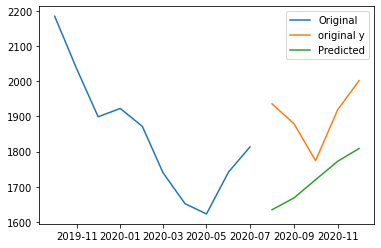

In [ ]:
#test example : 0
test_num=0
yhat = model.predict(testX[test_num].reshape(1, 10, 2), verbose=0)
testX_temp=[] #to store lead prices only, and not the second column which is usd inr exchange rate
for i in range(len(testX[test_num])):
  testX_temp.append(testX[test_num][i][0])
print("Predicted: ", yhat)
print("Actual: ",testY[test_num])
plt.plot(testXdates[test_num],testX_temp)#Traintemp and testtemp store actual values, not transformed. 
plt.plot(testYdates[test_num],testY[test_num])
plt.plot(testYdates[test_num],yhat[0])
plt.legend(["Original","original y","Predicted"])
plt.show()

Predicted:  [[1779.0479 1762.6898 1843.1802 1947.2908 1942.8701]]
Actual:  [1878.680372 1773.961685 1918.888424 2001.907066 2012.419036]


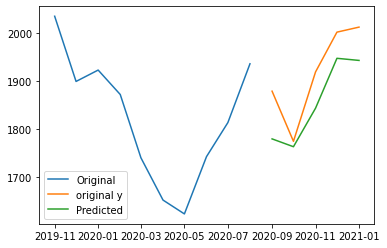

In [ ]:
#test example : 1
test_num=1
yhat = model.predict(testX[test_num].reshape(1, 10, 2), verbose=0)
testX_temp=[] #to store lead prices only, and not the second column which is usd inr exchange rate
for i in range(len(testX[test_num])):
  testX_temp.append(testX[test_num][i][0])
print("Predicted: ", yhat)
print("Actual: ",testY[test_num])
plt.plot(testXdates[test_num],testX_temp)#Traintemp and testtemp store actual values, not transformed. 
plt.plot(testYdates[test_num],testY[test_num])
plt.plot(testYdates[test_num],yhat[0])
plt.legend(["Original","original y","Predicted"])
plt.show()

Predicted:  [[1889.0612 1902.9009 1898.1879 1941.6545 1971.0314]]
Actual:  [1773.961685 1918.888424 2001.907066 2012.419036 2089.104842]


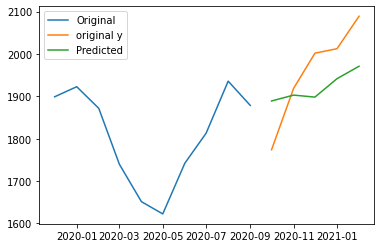

In [ ]:
#test example : 2
test_num=2
yhat = model.predict(testX[test_num].reshape(1, 10, 2), verbose=0)
testX_temp=[] #to store lead prices only, and not the second column which is usd inr exchange rate
for i in range(len(testX[test_num])):
  testX_temp.append(testX[test_num][i][0])
print("Predicted: ", yhat)
print("Actual: ",testY[test_num])
plt.plot(testXdates[test_num],testX_temp)#Traintemp and testtemp store actual values, not transformed. 
plt.plot(testYdates[test_num],testY[test_num])
plt.plot(testYdates[test_num],yhat[0])
plt.legend(["Original","original y","Predicted"])
plt.show()

Predicted:  [[2025.0118 2051.7935 2033.0245 2052.2239 2085.0564]]
Actual:  [1918.888424 2001.907066 2012.419036 2089.104842 1954.5692  ]


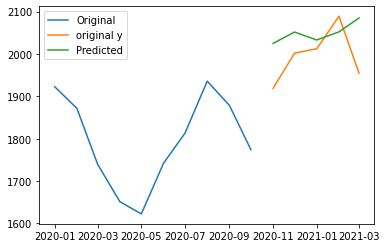

In [ ]:
#test example : 3
test_num= 3
yhat = model.predict(testX[test_num].reshape(1, 10, 2), verbose=0)
testX_temp=[] #to store lead prices only, and not the second column which is usd inr exchange rate
for i in range(len(testX[test_num])):
  testX_temp.append(testX[test_num][i][0])
print("Predicted: ", yhat)
print("Actual: ",testY[test_num])
plt.plot(testXdates[test_num],testX_temp)#Traintemp and testtemp store actual values, not transformed. 
plt.plot(testYdates[test_num],testY[test_num])
plt.plot(testYdates[test_num],yhat[0])
plt.legend(["Original","original y","Predicted"])
plt.show()

Predicted:  [[1820.3323 1875.6704 1931.0253 1974.3905 2087.5867]]
Actual:  [2001.907066 2012.419036 2089.104842 1954.5692   1997.856   ]


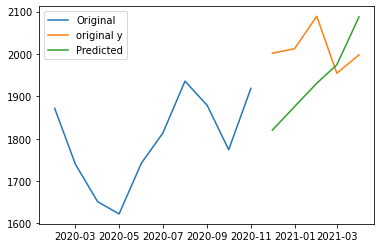

In [ ]:
#test example : 4
test_num= 4
yhat = model.predict(testX[test_num].reshape(1, 10, 2), verbose=0)
testX_temp=[] #to store lead prices only, and not the second column which is usd inr exchange rate
for i in range(len(testX[test_num])):
  testX_temp.append(testX[test_num][i][0])
print("Predicted: ", yhat)
print("Actual: ",testY[test_num])
plt.plot(testXdates[test_num],testX_temp)#Traintemp and testtemp store actual values, not transformed. 
plt.plot(testYdates[test_num],testY[test_num])
plt.plot(testYdates[test_num],yhat[0])
plt.legend(["Original","original y","Predicted"])
plt.show()

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(testY[4],yhat.reshape(5)))
# Unscaled RMSE values

130.46319018796316

The RMSE was better for LSTM Model, so the LSTM Model is the better one.

Saving Model:

In [ ]:

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle

In [ ]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

TypeError: ignored

In [ ]:
from keras.models import load_model

model.save('/content/model_CNN.h5')  # creates a HDF5 file 'my_model.h5'

NotImplementedError: ignored

In [ ]:
model.save('/content/model_CNN') #didnt work, stuff got ommitted, predictions wer

INFO:tensorflow:Assets written to: /content/model_CNN/assets


INFO:tensorflow:Assets written to: /content/model_CNN/assets


In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/model_CNN')